In [17]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import pandas as pd
import csv


[0]
101_1b1_Al_sc_Meditron
[0]
101_1b1_Pr_sc_Meditron
[1]
102_1b1_Ar_sc_Meditron


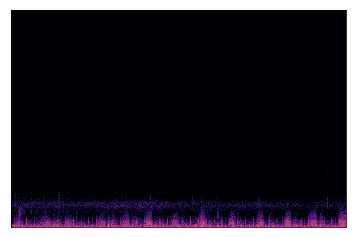

In [18]:
filename = np.array(pd.read_csv('data/SC_file_name.csv'))
answer = np.array(pd.read_csv('data/SC_answer.csv'))
size_ = 2
path = './test_train_image/'
path_test='./test_train_image/test/'
path_train='./test_train_image/train/'


#0 넣고 빼고로 잘돌아가는지 검사-ok
#step 0 은 101_1b1_Al_sc_Meditron을 기준으로 함
test_list=[0,1,2,3]
length=len(test_list)


for step in range(3):
    audio_path = 'data/wav/'+filename[step]
    #print(audio_path[0])
    y, sr = librosa.load(audio_path[0])
    D = np.abs(librosa.stft(y))
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max))
    print(answer[step])
    #plt.title(audio_path[0])
    #plt.figure(figsize=(0.78*size_,0.78*size_)) #size 56x56
    #plt.show()
    
    '''split the file name'''
    tmp_name=str(audio_path[0])
    tmp_name=tmp_name.split(".")
    tmp_name=tmp_name[0]
    tmp_name=tmp_name.split("/")
    print(tmp_name[2])
    
    if step in test_list:
        #print(step)
        if answer[step]==0:
            #test&answer=0
            plt.savefig(path_test+'test_0/'+''.join(tmp_name[2])+'.png')
        else:
            #test&answer=1
            plt.savefig(path_test+'test_1/'+''.join(tmp_name[2])+'.png')
    else:
        if answer[step]==0:
            #train&answer=0
            plt.savefig(path_train+'train_0/'+''.join(tmp_name[2])+'.png')
        else:
            #train&answer=1
            plt.savefig(path_train+'train_1/'+''.join(tmp_name[2])+'.png')    

In [19]:
'''[test]file_name.csv create'''
with open('[test]file_name.csv','w',newline='') as f:
    thewriter = csv.writer(f)
    thewriter.writerow(['header'])
    
    #test_list length
    for step in range(length):
        tmp_name='data/wav/'+filename[test_list[step]]
        tmp_name=str(tmp_name[0])
        tmp_name=tmp_name.split(".")
        tmp_name=tmp_name[0]
        tmp_name=tmp_name.split("/")
        print(tmp_name[2])
        thewriter.writerow([tmp_name[2]])
        

    '''[test]ans.csv create'''
with open('[test]answer.csv','w',newline='') as f:
    thewriter = csv.writer(f)
    thewriter.writerow(['answer'])
    
    for step in range(length):
        thewriter.writerow(answer[test_list[step]])



101_1b1_Al_sc_Meditron
101_1b1_Pr_sc_Meditron
102_1b1_Ar_sc_Meditron
104_1b1_Al_sc_Litt3200


In [20]:
'''[train]file_name.csv create'''
with open('[train]file_name.csv','w',newline='') as f:
    thewriter = csv.writer(f)
    thewriter.writerow(['header'])
    
    #전체개수로 range해야
    for step in range(10):
        if step in test_list:
            continue
        tmp_name='data/wav/'+filename[step]
        tmp_name=str(tmp_name[0])
        tmp_name=tmp_name.split(".")
        tmp_name=tmp_name[0]
        tmp_name=tmp_name.split("/")
        print(tmp_name[2])
        thewriter.writerow([tmp_name[2]])
        
    '''[train]ans.csv create'''
with open('[train]answer.csv','w',newline='') as f:
    thewriter = csv.writer(f)
    thewriter.writerow(['answer'])
    
    #전체개수로 range해야
    for step in range(10):
        if step in test_list:
            continue
        thewriter.writerow(answer[step])


104_1b1_Ar_sc_Litt3200
104_1b1_Ll_sc_Litt3200
104_1b1_Lr_sc_Litt3200
104_1b1_Pl_sc_Litt3200
104_1b1_Pr_sc_Litt3200
105_1b1_Tc_sc_Meditron
